In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
X = np.array([[1,2],[1,4],[1,0],[10,2],[10,4],[10,0]])
X

array([[ 1,  2],
       [ 1,  4],
       [ 1,  0],
       [10,  2],
       [10,  4],
       [10,  0]])

In [3]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [4]:
kmeans.labels_

array([1, 1, 1, 0, 0, 0])

In [5]:
kmeans.predict([[0,0], [12,3]])

array([1, 0])

In [6]:
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

In [7]:
from sklearn.metrics import silhouette_score

In [8]:
silhouette_score(X, kmeans.labels_)

0.7133477791749615

In [9]:
kmeans_1 = KMeans(n_clusters=3, random_state=0)
kmeans_1.fit(X)

KMeans(n_clusters=3, random_state=0)

In [10]:
kmeans_1.labels_

array([1, 1, 1, 0, 0, 2])

In [11]:
kmeans_1.predict([[0,0], [12,3], [83,73]])

array([1, 0, 0])

In [12]:
silhouette_score(X, kmeans_1.labels_)

0.43630092057240805

In [13]:
kmeans_1.inertia_

10.0

Text(0, 0.5, 'WCSS')

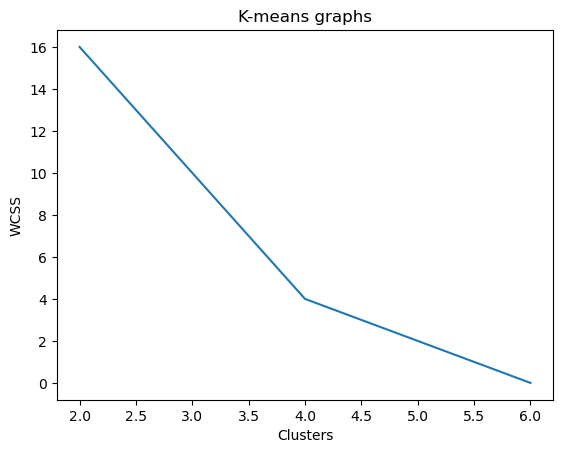

In [14]:
wcss=[]
for i in [2,3,4,5,6]:
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=40)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot([2,3,4,5,6],wcss)
plt.title("K-means graphs")
plt.xlabel("Clusters")
plt.ylabel("WCSS")

In [15]:
import pandas as pd
data = pd.read_csv(r"https://raw.githubusercontent.com/NelakurthiSudheer/Mall-Customers-Segmentation/main/Dataset/Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [16]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [17]:
data['Gender'].replace({"Male" : 1, "Female" : 0}, inplace=True)

In [18]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [19]:
X = data.iloc[:,1:]
X

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [29]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

In [30]:
kmeans.predict([[1, 21, 144, 87]])

array([1])

In [31]:
kmeans.labels_

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [32]:
silhouette_score(X, kmeans.labels_)

0.4440669204743008

Text(0, 0.5, 'WCSS')

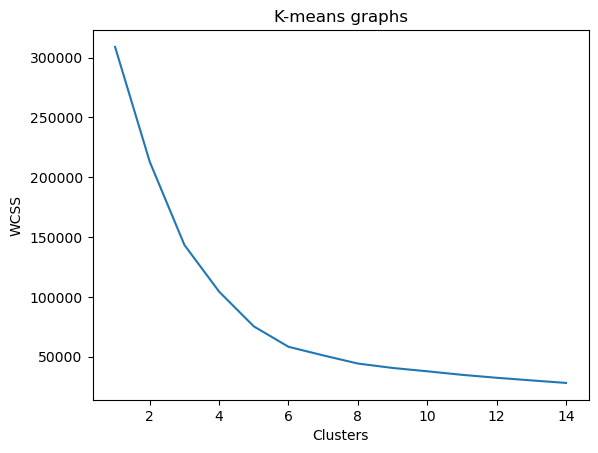

In [28]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=40)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,15),wcss)
plt.title("K-means graphs")
plt.xlabel("Clusters")
plt.ylabel("WCSS")

In [41]:
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=6, random_state=0)

In [42]:
silhouette_score(X, kmeans.labels_)

0.45205475380756527

In [46]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=6)
clustering.fit(X)

AgglomerativeClustering(n_clusters=6)

In [47]:
clustering.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 5, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 5,
       4, 5, 1, 5, 5, 5, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 5,
       1, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5,
       1, 1, 1, 5, 1, 1, 1, 5, 1, 5, 1, 5, 5, 1, 1, 5, 1, 5, 1, 1, 1, 1,
       1, 5, 1, 5, 5, 5, 1, 1, 1, 1, 5, 1, 1, 2, 5, 2, 0, 2, 0, 2, 0, 2,
       5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [48]:
silhouette_score(X, clustering.labels_)

0.4428008535928764

In [66]:
from sklearn.cluster import DBSCAN
clustering1 = DBSCAN(eps=1, min_samples=2).fit(X)

In [67]:
silhouette_score(X, clustering1.labels_)

-0.26880999295943075